<a href="https://colab.research.google.com/github/stevengregori92/Loan-Dataset-with-Tuning-CV-and-GridSearchCV/blob/main/Loan_Dataset_with_Tuning%2C_Cross_Validation_%2C_and_GridSearchCV_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install luwiji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
from jcopml.plot import plot_missing_value
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV

In [ ]:
data = pd.read_csv('loan_train.csv')
data

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,290000,0.0,7100000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,410600,0.0,4000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,807200,24000.0,25300000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,758300,0.0,18700000,360.0,1.0,Urban,Y


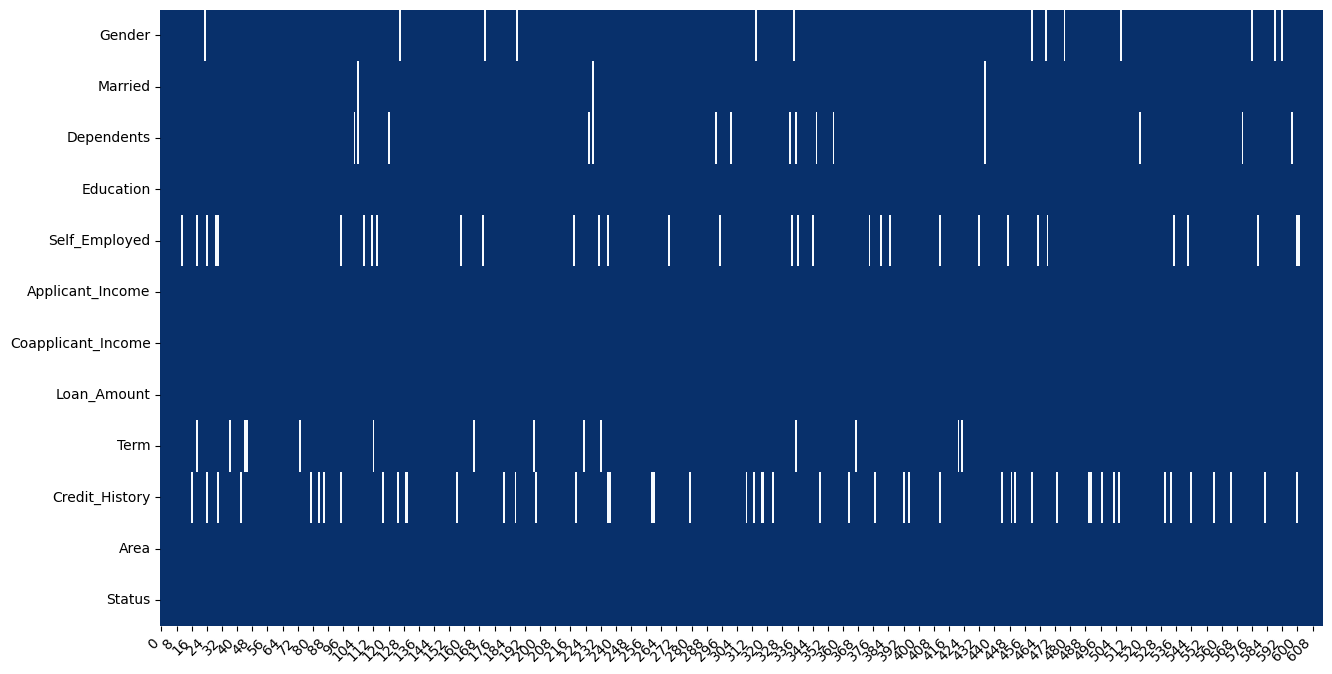

In [ ]:
plot_missing_value(data)

In [ ]:
data.isna().sum()

Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                  14
Credit_History        50
Area                   0
Status                 0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              601 non-null    object 
 1   Married             611 non-null    object 
 2   Dependents          599 non-null    object 
 3   Education           614 non-null    object 
 4   Self_Employed       582 non-null    object 
 5   Applicant_Income    614 non-null    int64  
 6   Coapplicant_Income  614 non-null    float64
 7   Loan_Amount         614 non-null    int64  
 8   Term                600 non-null    float64
 9   Credit_History      564 non-null    float64
 10  Area                614 non-null    object 
 11  Status              614 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 57.7+ KB


In [ ]:
data.groupby('Gender').mean()

,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History
Gender,,,,,
Female,464347.321429,110800.892857,1.233036e+07,352.293578,0.831683
Male,544646.012270,174293.235172,1.437730e+07,339.665272,0.847007


In [ ]:
data['Applicant_Income'] = data['Applicant_Income'].astype(float)
data['Loan_Amount'] = data['Loan_Amount'].astype(float)

In [ ]:
X = data.drop(columns=['Status'])
y = data.Status

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((491, 11), (123, 11), (491,), (123,))

#Pipeline

In [ ]:
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'mean')),
    ('scaler', MinMaxScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('scaler', OneHotEncoder())
])

In [ ]:
preprocessor = ColumnTransformer([
    ('numeric', numerical_pipeline, ['Applicant_Income', 'Coapplicant_Income', 'Loan_Amount', 'Term', 'Credit_History']),
    ('categoric', categorical_pipeline, ['Area', 'Self_Employed', 'Education', 'Dependents', 'Married', 'Gender'])
])

In [ ]:
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', KNeighborsClassifier())
])

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Applicant_Income',
                                                   'Coapplicant_Income',
                                                   'Loan_Amount', 'Term',
                                                   'Credit_History']),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaler',
                                                                   OneHotEncoder())]),
                                                  ['Area', 'Self_Employed',
                                                   'Education', 'Dependents',
                                                   'Married', 'Gender'])])),
                ('algo', KNeighborsClassifier())])

In [ ]:
pipeline.score(X_test, y_test)

0.7073170731707317

#GridSearchCV

In [ ]:
parameters = {
    'algo__n_neighbors' : range(1, 51,2),
    'algo__weights' : ['uniform', 'distance'],
    'algo__p' : [1,2]
}

model = GridSearchCV(pipeline, parameters, cv=3, n_jobs=-1, verbose = 1)
model.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['Applicant_Income',
                                                                          'Coapplicant_Income',
                                                                          'Loan_Amount',
                                                                          'Term',
                                                                          'Credit_History']),
                                                                        ('categoric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('scaler',
                                                                                          OneHotEncoder())]),
                                                                         ['Area',
                                                                          'Self_Employed',
                                                                          'Education',
                                                                          'Dependents',
                                                                          'Married',
                                                                          'Gender'])])),
                                       ('algo', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'algo__n_neighbors': range(1, 51, 2),
                         'algo__p': [1, 2],
                         'algo__weights': ['uniform', 'distance']},
             verbose=1)

In [ ]:
model.best_params_

{'algo__n_neighbors': 7, 'algo__p': 2, 'algo__weights': 'distance'}

In [ ]:
model.score(X_train, y_train), model.score(X_test, y_test)

(1.0, 0.7154471544715447)